# **Data Science Assignment: eCommerce Transactions Dataset**

# **Task 3: Customer Segmentation / Clustering**

In [ ]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# For calculating similarity
from sklearn.metrics.pairwise import cosine_similarity

# For visualizations (if needed)
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

# Load the customer and transaction datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge data on CustomerID
merged_data = pd.merge(customers, transactions, on='CustomerID', how='inner')

# Display merged data
print(merged_data.head())


  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      P083  2024-05-07 03:11:44         2      911.44  455.72  
4      P029  2024-11-02 17:04:16         3     1300.92  433.64  


In [ ]:
# Aggregate transaction data by customer
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',         # Total spending per customer
    'Quantity': 'sum',           # Total quantity of products purchased
    'ProductID': lambda x: list(x)  # List of products purchased
}).reset_index()

# Optional: Add more profile features based on other columns (e.g., age, region)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
X = customer_profiles[['TotalValue', 'Quantity']]  # You can add more features here

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


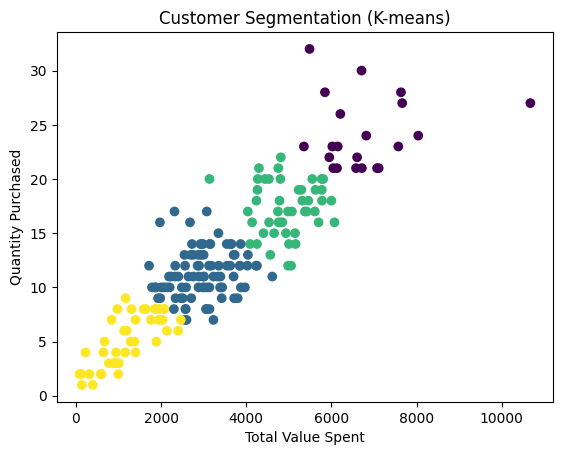

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(customer_profiles['TotalValue'], customer_profiles['Quantity'], c=customer_profiles['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (K-means)')
plt.xlabel('Total Value Spent')
plt.ylabel('Quantity Purchased')
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, customer_profiles['Cluster'])
print(f"DB Index: {db_index}")


DB Index: 0.72127971818163


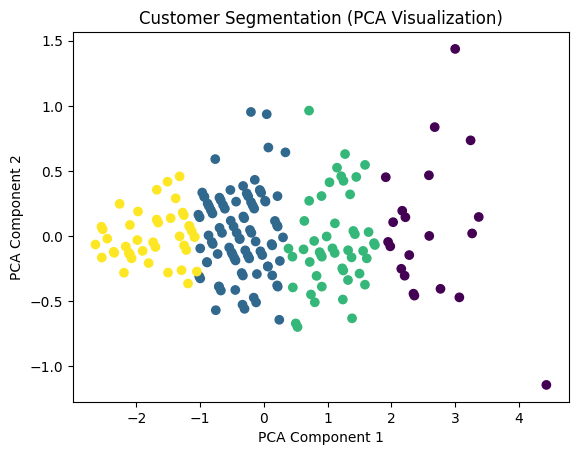

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-reduced clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_profiles['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
